<a href="https://colab.research.google.com/github/insha-amreen/car-prediction-using-linear-regression/blob/main/INSHA_Carpredictiion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict the prices of used cars based on the features given below
1. car brand
2.year
3. Sold price
4.present price
5. KM s driven
6.fuel type
7. Seller type
8. Transmission type
9. Owners


Do the Data Preprocessing and Data analysis on the given dataset and keep it ready for model building

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
car = pd.read_csv("/content/car data.csv")
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
car.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
car.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [ ]:
car.shape

(301, 9)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car.loc[car.Owner == 3]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


In [ ]:
car.loc[car.Transmission != "Manual"].count()

Car_Name         40
Year             40
Selling_Price    40
Present_Price    40
Kms_Driven       40
Fuel_Type        40
Seller_Type      40
Transmission     40
Owner            40
dtype: int64

In [ ]:
car['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [ ]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking c distrib of categorical data
car.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
#to count the no. of dealers n indivituals use .value_counts()
car.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
car.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

encoding categorical data

In [ ]:
#encoding  Fuel_type column
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [ ]:
car.replace({'Seller_Type':{'Dealer':0,'Indivitual':1}},inplace=True)

In [ ]:
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [ ]:
car.head()
#to get o/p together do run all option

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
#splitting data n target
#drop the car name
X=car.drop(['Car_Name','Selling_Price'],axis=1)
y=car['Selling_Price']
X


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
#splitting training n test data
#random state is used when in df when there are continous values n then discontinous values then it is used,if u dont specify
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test =train_test_split(X ,y ,test_size=0.1,random_state=2)

Model training
linear regression

In [ ]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
X=X.apply(pd.to_numeric, errors='coerce')
y=y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
#splitting the training and testing data
X_train, X_test, y_train, y_test=train_test_split(X, y ,test_size=0.1, random_state=2)
#.fit is used for-
clf=LinearRegression().fit(X_train, y_train)

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
#model evaluation
#predicting on training data

training_data_prediction=clf.predict(X_train)

In [ ]:
#r squared error

error_score =metrics.r2_score(y_train, training_data_prediction)
print("R squared error :",error_score)

R squared error : 0.8739682506756723


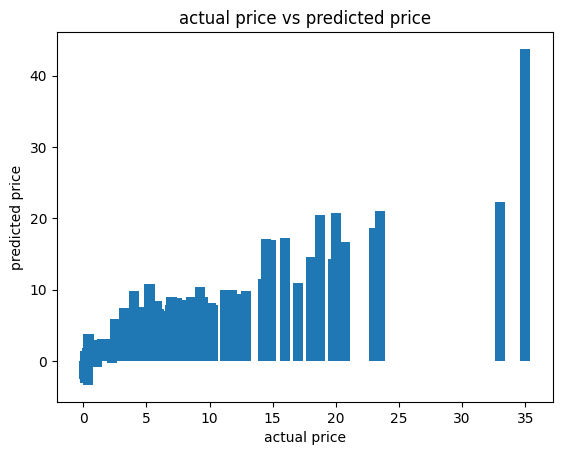

In [ ]:
#visualize the actual and predicted prices
plt.bar(y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual price vs predicted price")
plt.show()

In [ ]:
#prediction on testing data
testing_data_prediction=clf.predict(X_test)

In [ ]:
error_score=metrics.r2_score(y_test, testing_data_prediction)
print("r squared error:",error_score)

r squared error: 0.8028464620807498


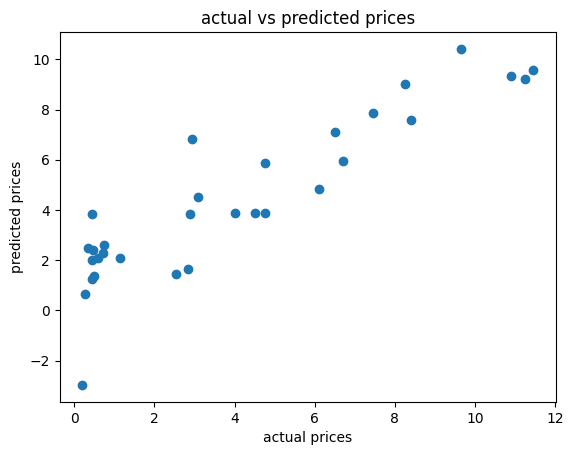

In [ ]:

#visualizing actual and predicted prices
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual vs predicted prices")
plt.show()

lasso regression:

In [ ]:
#loading the linear regression model in lasso
lass_reg_model=Lasso()

In [ ]:
from sklearn.linear_model import Lasso
cld=Lasso().fit(X_train, y_train)

In [ ]:
#model evaluation
training_data_prediction=cld.predict(X_train)

In [ ]:
#r squared error
error_score=metrics.r2_score(y_train, training_data_prediction)
print("r squared error:",error_score)

r squared error: 0.8427856123435794


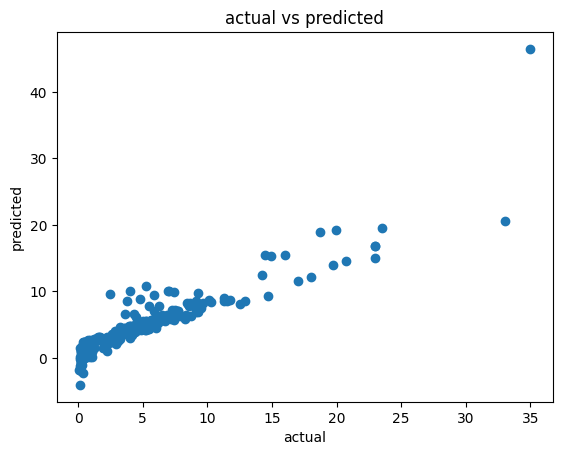

In [ ]:
#visualizing actual and predicted values
plt.scatter(y_train, training_data_prediction)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")
plt.show()

In [ ]:
#prediction on test data(model evaluation)
test_data_prediction=cld.predict(X_test)

In [ ]:

#r squared error
error_score=metrics.r2_score(y_test, test_data_prediction)
print("r squared error:",error_score)

r squared error: 0.8709167941173195


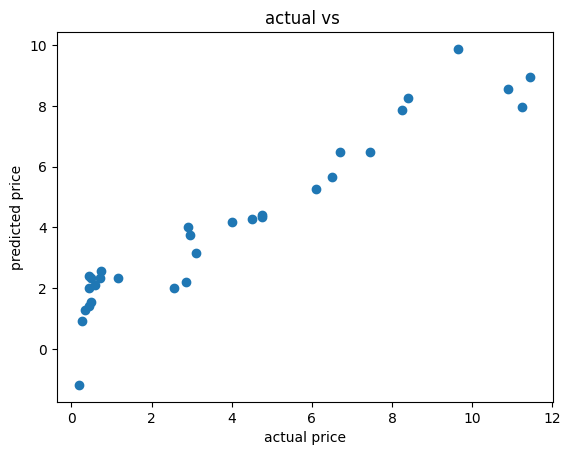

In [ ]:
#testing for visualization comparing predicted and actual prices
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs ")
plt.show()